

<h2><i><b><center><font size="+4"face="Ribbon" color="bronze">Loan Prediction</font></center></b></i></h2>

   


In [1]:
# Intractive notebook
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import warnings
warnings.filterwarnings('ignore')
#pd.set_option("display.max_columns",50)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics
from sklearn.feature_selection import SelectFromModel
from sklearn import svm
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer 
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score,GridSearchCV,StratifiedKFold,RepeatedStratifiedKFold,RandomizedSearchCV
from sklearn.metrics import accuracy_score,auc,recall_score,precision_score,precision_recall_curve,confusion_matrix,\
plot_confusion_matrix,plot_precision_recall_curve,plot_roc_curve,classification_report,roc_auc_score,f1_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler
from sklearn.linear_model import LogisticRegression

In [2]:
train_data=pd.read_csv("TRAIN_LP.csv")
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
train_data.shape

(614, 13)

In [4]:
test_data=pd.read_csv("TEST_LP.csv")
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
test_data.shape

(367, 12)

<h2><i><b><center><font size="6"face="Ribbon" color="bronze">Basic summary of dataset</font></center></b></i></h2>



In [6]:
def data_info(df=train_data):
    df_info = pd.DataFrame(df.isna().sum(),columns = ['Null_count'])
    df_info['Non_Null_count'] = df_info.index.map(df.notna().sum())
    df_info['N_unique'] = df_info.index.map(df.nunique())
    df_info['D_types'] = df_info.index.map(df.dtypes)
    df_info['Blank_count'] = df_info.index.map((df=='').sum())
    return df_info

In [7]:
#only 6 variables have null values 
data_info(train_data)

,Null_count,Non_Null_count,N_unique,D_types,Blank_count
Loan_ID,0,614,614,object,0
Gender,13,601,2,object,0
Married,3,611,2,object,0
Dependents,15,599,4,object,0
Education,0,614,2,object,0
Self_Employed,32,582,2,object,0
ApplicantIncome,0,614,505,int64,0
CoapplicantIncome,0,614,287,float64,0
LoanAmount,22,592,203,float64,0
Loan_Amount_Term,14,600,10,float64,0


In [8]:
#only 6 variables have null values 
data_info(test_data)

,Null_count,Non_Null_count,N_unique,D_types,Blank_count
Loan_ID,0,367,367,object,0
Gender,11,356,2,object,0
Married,0,367,2,object,0
Dependents,10,357,4,object,0
Education,0,367,2,object,0
Self_Employed,23,344,2,object,0
ApplicantIncome,0,367,314,int64,0
CoapplicantIncome,0,367,194,int64,0
LoanAmount,5,362,144,float64,0
Loan_Amount_Term,6,361,12,float64,0


In [9]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
#checking details of dataframe
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


<h2><i><b><center><font size="6"face="Ribbon" color="bronze">Checking event rate</font></center></b></i></h2>


In [11]:
# to check that the classes are balanced or not(checking the event rate)
from collections import Counter
Counter(train_data.Loan_Status)
train_data.Loan_Status.value_counts(normalize=True)

Counter({'Y': 422, 'N': 192})

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

In [12]:
train_data['Loan_Status'] = np.where(train_data.Loan_Status == 'Y',1,0)

<h2><i><b><center><font size="6" face="Ribbon" color="bronze">Treating null values</font></center></b></i></h2>


In [13]:
train_data.isna().sum()[train_data.isna().sum()>0]

Gender              13
Married              3
Dependents          15
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
dtype: int64

<h2><i><b><font size="5" face="Ribbon" color="bronze">Treating null values of categorical variables</font></b></i></h2>


In [14]:
var = 'Gender'
train_data[var].value_counts(dropna = False,normalize = True)
pd.crosstab(index = train_data[var].fillna('Nan'), columns = train_data.Loan_Status,margins = True,normalize='index',)

Male      0.796417
Female    0.182410
NaN       0.021173
Name: Gender, dtype: float64

Loan_Status,0,1
Gender,,
Female,0.330357,0.669643
Male,0.306748,0.693252
Nan,0.384615,0.615385
All,0.312704,0.687296


In [15]:
#Only 2% null values are there in gender column so we will impute them by mode
train_data['Gender'].fillna(train_data['Gender'].mode()[0],inplace=True)

In [16]:
var = 'Married'
train_data[var].value_counts(dropna = False,normalize = True)
pd.crosstab(index = train_data[var].fillna('Nan'), columns = train_data.Loan_Status,margins = True,normalize='index',)

Yes    0.648208
No     0.346906
NaN    0.004886
Name: Married, dtype: float64

Loan_Status,0,1
Married,,
Nan,0.000000,1.000000
No,0.370892,0.629108
Yes,0.283920,0.716080
All,0.312704,0.687296


In [17]:
#only 0.4% null values are there so we will impute it by mode
train_data['Married'].fillna(train_data['Married'].mode()[0],inplace=True)

In [18]:
var = 'Dependents'
train_data[var].value_counts(dropna = False,normalize = True)
pd.crosstab(index = train_data[var].fillna('Nan'), columns = train_data.Loan_Status,margins = True,normalize='index',)

0      0.561889
1      0.166124
2      0.164495
3+     0.083062
NaN    0.024430
Name: Dependents, dtype: float64

Loan_Status,0,1
Dependents,,
0,0.310145,0.689855
1,0.352941,0.647059
2,0.247525,0.752475
3+,0.352941,0.647059
Nan,0.400000,0.600000
All,0.312704,0.687296


In [19]:
train_data['Dependents'].fillna(train_data['Dependents'].mode()[0],inplace=True)

In [20]:
var = 'Self_Employed'
train_data[var].value_counts(dropna = False,normalize = True)
pd.crosstab(index = train_data[var].fillna('Nan'), columns = train_data.Loan_Status,margins = True,normalize='index',)

No     0.814332
Yes    0.133550
NaN    0.052117
Name: Self_Employed, dtype: float64

Loan_Status,0,1
Self_Employed,,
Nan,0.281250,0.718750
No,0.314000,0.686000
Yes,0.317073,0.682927
All,0.312704,0.687296


In [21]:
#only 5% null values are there so we will impute it by mode
train_data['Self_Employed'].fillna(train_data['Self_Employed'].mode()[0],inplace=True)

In [22]:
#converting credit history column to object wherever it is not null; null is maintained as null
train_data['Credit_History'] = np.where(train_data['Credit_History'].isna(),np.nan, train_data['Credit_History'].astype(str))

In [23]:
var = 'Credit_History'
train_data[var].value_counts(dropna = False,normalize = True)
pd.crosstab(index = train_data[var].fillna('Nan'), columns = train_data.Loan_Status,margins = True,normalize='index',)

1.0    0.773616
0.0    0.144951
NaN    0.081433
Name: Credit_History, dtype: float64

Loan_Status,0,1
Credit_History,,
0.0,0.921348,0.078652
1.0,0.204211,0.795789
Nan,0.260000,0.740000
All,0.312704,0.687296


In [24]:
#only 8% null values are there so we will impute it by mode
train_data['Credit_History'].fillna(train_data['Credit_History'].mode()[0],inplace=True)

<h2><i><b><font size="5" face="Ribbon" color="bronze">Treating null values of numerical variables</font></b></i></h2>

<h2><i><b><font size="5" face="Ribbon" color="black">Imputing in train set</font></b></i></h2>

In [25]:
train_data.isna().sum()[train_data.isna().sum()>0]

LoanAmount          22
Loan_Amount_Term    14
dtype: int64

In [26]:
#Imputing LoanAmount and LoanAmountTerm by mean
train_data['LoanAmount'].fillna(train_data['LoanAmount'].mean(),inplace=True)
train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mean(),inplace=True)

In [27]:
#to check any null values still left
train_data.isna().sum()[train_data.isna().sum()>0]

Series([], dtype: int64)

<h2><i><b><font size="5" face="Ribbon" color="black">Imputing in test set</font></b></i></h2>

In [28]:
test_data.isna().sum()[test_data.isna().sum()>0] 

Gender              11
Dependents          10
Self_Employed       23
LoanAmount           5
Loan_Amount_Term     6
Credit_History      29
dtype: int64

In [29]:
#We have replaced the missing/null values of 6 variables in the test data
test_data['Gender'].fillna(train_data['Gender'].mode()[0],inplace=True)
test_data['Married'].fillna(train_data['Married'].mode()[0],inplace=True)
test_data['Dependents'].fillna(train_data['Dependents'].mode()[0],inplace=True)
test_data['Self_Employed'].fillna(train_data['Self_Employed'].mode()[0],inplace=True)
test_data['LoanAmount'].fillna(train_data['LoanAmount'].mean(),inplace=True)
test_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mode()[0],inplace=True)
test_data['Credit_History'].fillna(train_data['Credit_History'].mode()[0],inplace=True)

In [30]:
#to check any null values in test set
test_data.isna().sum()[test_data.isna().sum()>0]

Series([], dtype: int64)

<h2><i><b><center><font size="6" face="Ribbon" color="bronze">Preparing list of numerical and categorical variables separately</font></center></b></i></h2>

In [31]:
target = 'Loan_Status'
obj_cols = train_data.head().select_dtypes('O').columns # O means object
obj_cols = [i for  i in obj_cols if i not in [target,'Loan_ID']] # removing target and loan id from obj columns as they are not vars
obj_cols
num_cols = train_data.head().select_dtypes('number').columns # O means object
num_cols= [i for  i in num_cols if i not in [target,'Loan_ID']] # removing target and loan id from obj columns as they are not vars
num_cols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Credit_History',
 'Property_Area']

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

<h2><i><b><center><font size="6" face="Ribbon" color="bronze">Effect of Input variables on output variables</font></center></b></i></h2>

<h2><i><b><center><font size="5" face="Ribbon" color="green">Effect of categorical variables on output variables</font></center></b></i></h2>

<h2><b><center><font size="5" face="Ribbon" color="BLACK">BAR GRAPHS</font></center></b></h2>

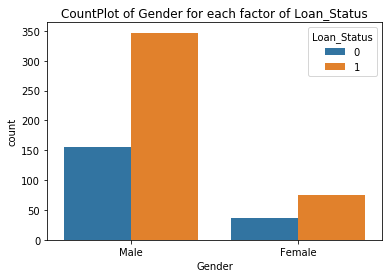

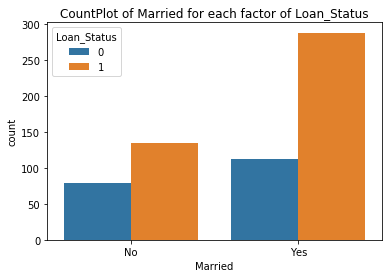

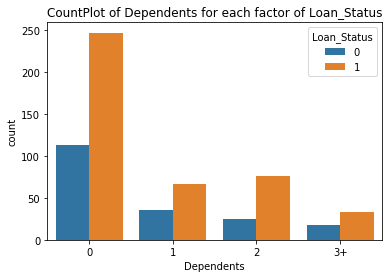

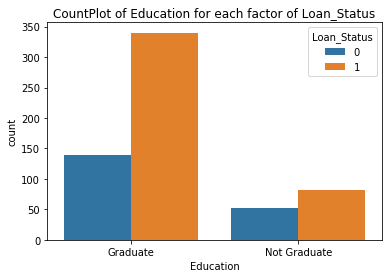

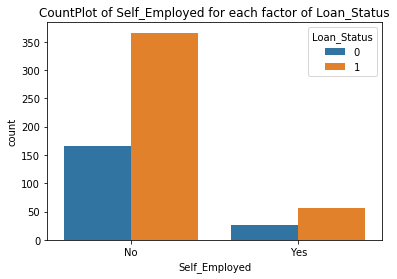

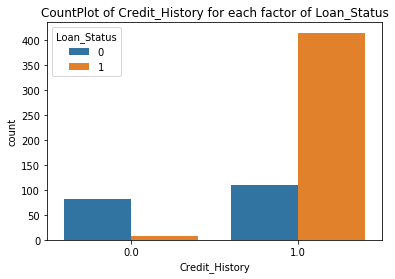

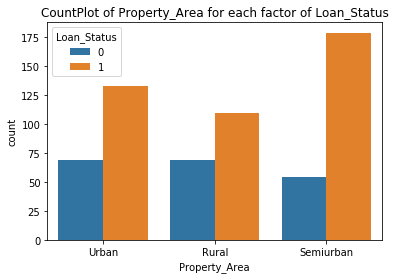

In [32]:
#BAR GRAPHS
for i in obj_cols:
    pfig = plt.figure();
    img = sns.countplot(x= i ,hue= target, data=train_data).set_title(f'CountPlot of {i} for each factor of {target}');
    fig = img.get_figure();
 

<h2><i><b><center><font size="5" face="Ribbon" color="green">Effect of numerical variables on output variables</font></center></b></i></h2>

<h2><b><center><font size="5" face="Ribbon" color="BLACK">PAIR PLOTS</font></center></b></h2>

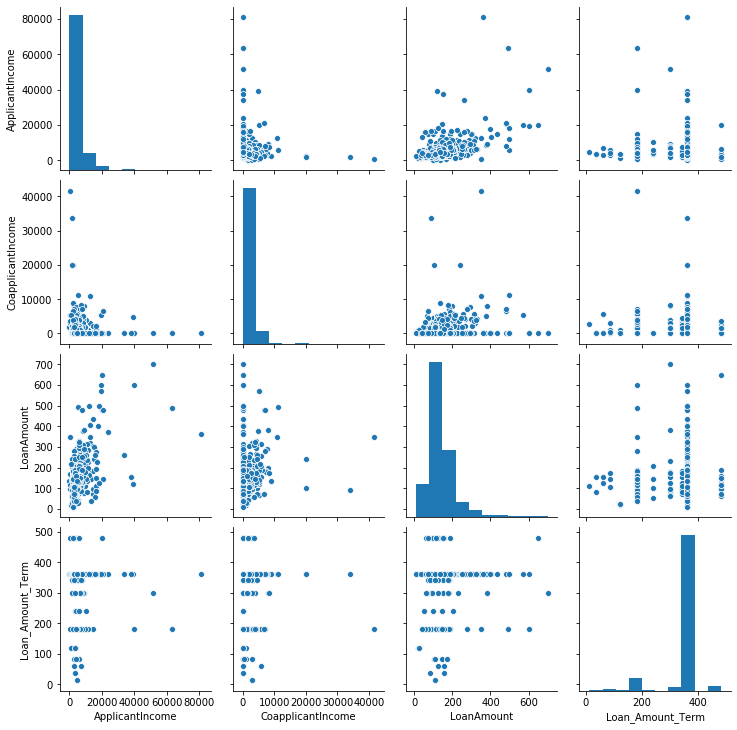

In [33]:
#PAIR PLOTS
sns.pairplot(train_data[num_cols]);

<h2><b><center><font size="5" face="Ribbon" color="BLACK">BOX PLOTS</font></center></b></h2>

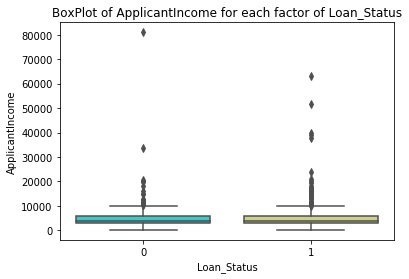

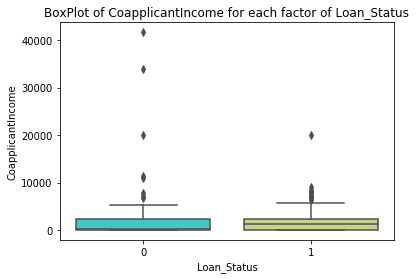

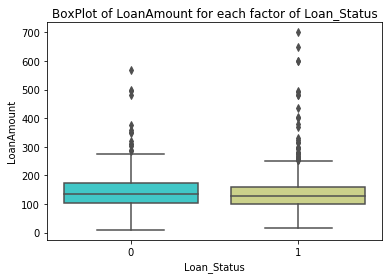

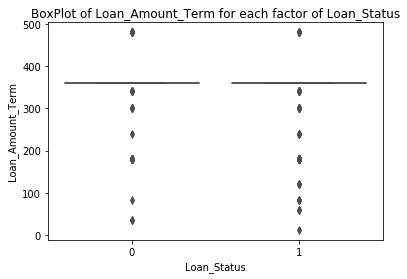

In [34]:
#BOX PLOTS FOR EACH VARIABLE
for i in num_cols:
    pfig = plt.figure();
    img = sns.boxplot(x=target,y=i,data=train_data,palette='rainbow').set_title(f'BoxPlot of {i} for each factor of {target}');
    fig = img.get_figure();
 

<h2><b><center><font size="5" face="Ribbon" color="BLACK">CORELATION MATRIX</font></center></b></h2>

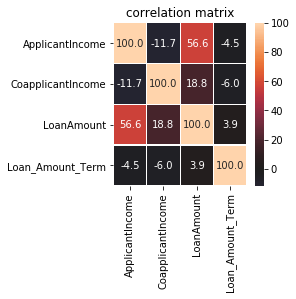

In [35]:
#CORELATION MATRIX
cor_mat = train_data[num_cols].corr()
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
fig, ax = plt.subplots(figsize=(3,3)) ;
x = sns.heatmap(100*cor_mat, annot=True,fmt='.1f',center=0,linewidths = 0.25).set_title('correlation matrix')
plt.show()


<h2><i><b><center><font size="6" face="Ribbon" color="bronze">Distribution of Individual input variables</font></center></b></i></h2>
<br><h2><i><b><center><font size="5" face="Ribbon" color="bronze">(helps in outlier detection)</font></center></b></i></h2>

In [36]:
train_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History        object
Property_Area         object
Loan_Status            int64
dtype: object

In [37]:
num_cols

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

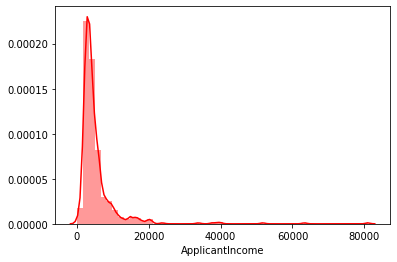

In [38]:
#to see the variable distribution
sns.distplot(train_data['ApplicantIncome'], kde=True,rug=False,color="r")

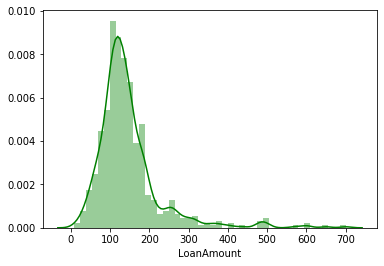

In [39]:
#to see the variable distribution
sns.distplot(train_data['LoanAmount'], kde=True,color="g")

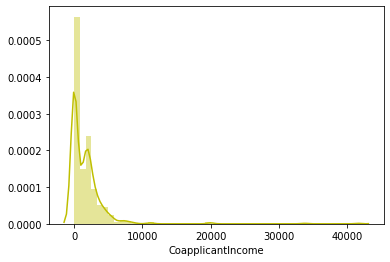

In [40]:
#to see the variable distribution
sns.distplot(train_data['CoapplicantIncome'], kde=True,color="y")

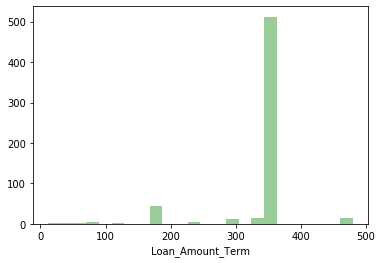

In [41]:
#to see the variable distribution
sns.distplot(train_data['Loan_Amount_Term'], kde=False,color="g")

<h2><i><b><center><font size="6" face="Ribbon" color="bronze">Conversion of numeric variables into categorical variables</font></center></b></i></h2>

<h2><b><font size="5" face="Ribbon" color="black">LOAN AMOUNT TRAIN DATA</font></b></h2>


In [42]:
train_data['LoanAmount'].value_counts(bins=11)

(71.818, 134.636]     277
(134.636, 197.455]    191
(8.308, 71.818]        61
(197.455, 260.273]     44
(260.273, 323.091]     18
(323.091, 385.909]      8
(448.727, 511.545]      7
(385.909, 448.727]      3
(637.182, 700.0]        2
(574.364, 637.182]      2
(511.545, 574.364]      1
Name: LoanAmount, dtype: int64

In [43]:
train_data['LoanAmount'].value_counts(bins=4)

(8.308, 181.75]    494
(181.75, 354.5]    101
(354.5, 527.25]     14
(527.25, 700.0]      5
Name: LoanAmount, dtype: int64

In [44]:
train_data['LoanAmount'].value_counts(bins=3)

(8.308, 239.333]      556
(239.333, 469.667]     46
(469.667, 700.0]       12
Name: LoanAmount, dtype: int64

In [45]:
train_data['LoanAmount'].describe().transpose

<bound method IndexOpsMixin.transpose of count    614.000000
mean     146.412162
std       84.037468
min        9.000000
25%      100.250000
50%      129.000000
75%      164.750000
max      700.000000
Name: LoanAmount, dtype: float64>

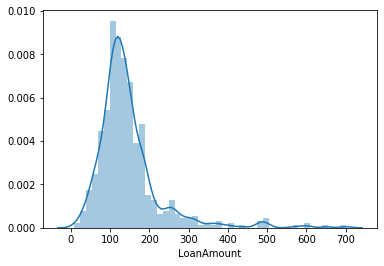

In [46]:
#to see the variable distribution
sns.distplot(train_data['LoanAmount'], kde=True)

In [47]:
sum= train_data[train_data['LoanAmount']>400]
sum['LoanAmount'].count()

14

<h2><i><b><center><font size="5" face="Ribbon" color="green">Capping values</font></center></b></i></h2>
<br><h2><i><b><center><font size="4" face="Ribbon" color="black">capping values by a certain number such that the outlier percentage must be under 5%.</font></center></b></i></h2>

In [48]:
#CAPPING VALUES
#Capping above 400 which since only 14 obs out of 614 obs have loanamount greater than 400 which is around 1.95%.
#So we will cap it at 400 
train_data['LoanAmount_C']= np.where(train_data['LoanAmount'] > 400, 400, train_data['LoanAmount'])

<h2><i><b><center><font size="5" face="Ribbon" color="green">Converting them into bins</font></center></b></i></h2>


In [49]:
#CONVERTING THEM INTO BINS
train_data['LoanAmount_C']= pd.cut(train_data['LoanAmount'],labels=["very low","low","medium","high"], bins= [0,75,125,400,1000],right=False)
train_data['LoanAmount_C'].value_counts()

medium      318
low         215
very low     66
high         15
Name: LoanAmount_C, dtype: int64

<h2><i><b><center><font size="5" face="Ribbon" color="green">Bar graph of numerical variables after converting them into categorical variable using bins</font></center></b></i></h2>


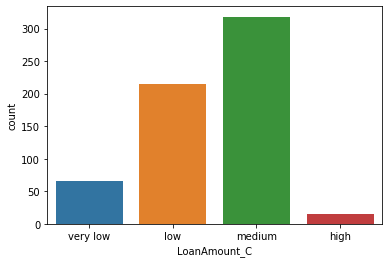

In [50]:
#PLOTTING
sns.countplot(x='LoanAmount_C',data = train_data)

In [51]:
#to check no null value has been created while forming bins
train_data['LoanAmount_C'].isna().sum()

0

<h2><b><font size="5" face="Ribbon" color="black">LOAN AMOUNT TEST DATA</font></b></h2>

In [52]:
#LOAN AMOUNT TEST DATA
test_data['LoanAmount'].value_counts(bins=11)

(122.909, 170.364]    130
(75.455, 122.909]     130
(170.364, 217.818]     49
(27.477, 75.455]       35
(217.818, 265.273]     10
(265.273, 312.727]      7
(312.727, 360.182]      2
(502.545, 550.0]        1
(455.091, 502.545]      1
(407.636, 455.091]      1
(360.182, 407.636]      1
Name: LoanAmount, dtype: int64

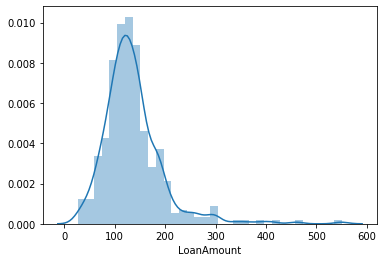

In [53]:
sns.distplot(test_data['LoanAmount'], kde=True)

<h2><i><b><center><font size="5" face="Ribbon" color="green">Capping values and plotting bar graph of numerical variables after converting them into categorical variable using bins</font></center></b></i></h2>

very low    150
low         143
high         71
Name: LoanAmount_C, dtype: int64

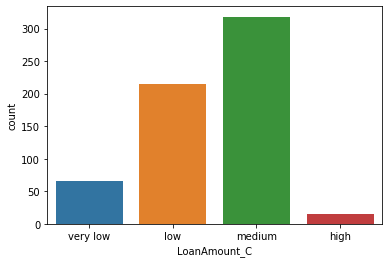

In [54]:
#FOR TEST DATA
#CAPPING VALUES
test_data['LoanAmount_C']= np.where(test_data['LoanAmount'] > 300, 300, test_data['LoanAmount'])
#CONVERTING THEM INTO BINS
test_data['LoanAmount_C']= pd.cut(test_data['LoanAmount'],labels=["very low","low","high"], bins= [0,120,170,400],right=False)
test_data['LoanAmount_C'].value_counts()
#PLOTTING
sns.countplot(x='LoanAmount_C',data = train_data)

<h2><b><font size="5" face="Ribbon" color="black">APPLICANT INCOME TRAIN DATA</font></b></h2>


In [55]:
#APPLICANT INCOME TRAIN DATA
train_data['ApplicantIncome'].value_counts(bins=20)

(69.149, 4192.5]      353
(4192.5, 8235.0]      180
(8235.0, 12277.5]      44
(12277.5, 16320.0]     15
(16320.0, 20362.5]     12
(20362.5, 24405.0]      3
(36532.5, 40575.0]      3
(48660.0, 52702.5]      1
(32490.0, 36532.5]      1
(60787.5, 64830.0]      1
(76957.5, 81000.0]      1
(44617.5, 48660.0]      0
(40575.0, 44617.5]      0
(72915.0, 76957.5]      0
(28447.5, 32490.0]      0
(24405.0, 28447.5]      0
(52702.5, 56745.0]      0
(56745.0, 60787.5]      0
(64830.0, 68872.5]      0
(68872.5, 72915.0]      0
Name: ApplicantIncome, dtype: int64

In [56]:
train_data['ApplicantIncome'].value_counts(bins=4)

(69.149, 20362.5]     604
(20362.5, 40575.0]      7
(60787.5, 81000.0]      2
(40575.0, 60787.5]      1
Name: ApplicantIncome, dtype: int64

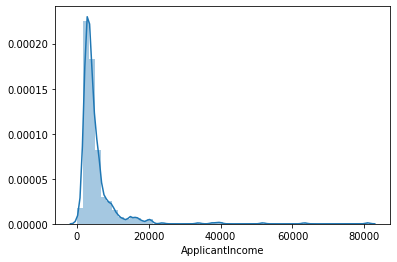

In [57]:
#to see the variable distribution
sns.distplot(train_data['ApplicantIncome'], kde=True)

In [58]:
sum= train_data[train_data['ApplicantIncome']>20000]
sum['ApplicantIncome'].count()

12

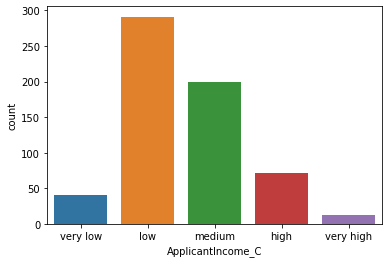

In [59]:
#CAPPING VALUES
#Capping above 20000 which since only 12 obs out of 614 obs have ApplicantIncome greater than 20000 which is around 1.95%.
#So we will cap it at 20000
train_data['ApplicantIncome_C']= np.where(train_data['ApplicantIncome'] > 20000, 20000, train_data['ApplicantIncome'])
#CONVERTING THEM INTO BINS
train_data['ApplicantIncome_C']= pd.cut(train_data['ApplicantIncome'],labels = ["very low","low","medium","high","very high"], bins= [0,2000,4000,8000,20000,100000],right=False)
#PLOTTING
sns.countplot(x='ApplicantIncome_C',data = train_data)

In [60]:
#to check no null value has been created while forming bins
train_data['ApplicantIncome_C'].isna().sum()

0

<h2><b><font size="5" face="Ribbon" color="black">APPLICANT INCOME TEST DATA</font></b></h2>


In [61]:
#FOR TEST DATA APPLICANT INCOME
test_data['ApplicantIncome'].value_counts(bins=20)

(-72.53, 3626.45]      169
(3626.45, 7252.9]      150
(7252.9, 10879.35]      32
(10879.35, 14505.8]      7
(14505.8, 18132.25]      4
(29011.6, 32638.05]      2
(18132.25, 21758.7]      1
(21758.7, 25385.15]      1
(68902.55, 72529.0]      1
(36264.5, 39890.95]      0
(65276.1, 68902.55]      0
(39890.95, 43517.4]      0
(25385.15, 29011.6]      0
(43517.4, 47143.85]      0
(47143.85, 50770.3]      0
(50770.3, 54396.75]      0
(54396.75, 58023.2]      0
(58023.2, 61649.65]      0
(61649.65, 65276.1]      0
(32638.05, 36264.5]      0
Name: ApplicantIncome, dtype: int64

In [62]:
#CAPPING VALUES
test_data['ApplicantIncome_C']= np.where(test_data['ApplicantIncome'] > 20000, 20000, test_data['ApplicantIncome'])
#CONVERTING THEM INTO BINS
test_data['ApplicantIncome_C']= pd.cut(test_data['ApplicantIncome'],labels = ["very low","low","medium","high","very high"], bins= [0,2000,4000,8000,20000,100000],right=False)

<h2><b><font size="5" face="Ribbon" color="black">COAPPLICANT INCOME TRAIN DATA</font></b></h2>


In [63]:
#FOR TRAIN DATA COAPPLICANT INCOME
train_data['CoapplicantIncome'].value_counts(bins=20)

(-41.668, 2083.35]     434
(2083.35, 4166.7]      127
(4166.7, 6250.05]       36
(6250.05, 8333.4]       10
(10416.75, 12500.1]      2
(18750.15, 20833.5]      2
(8333.4, 10416.75]       1
(33333.6, 35416.95]      1
(39583.65, 41667.0]      1
(27083.55, 29166.9]      0
(25000.2, 27083.55]      0
(22916.85, 25000.2]      0
(20833.5, 22916.85]      0
(37500.3, 39583.65]      0
(16666.8, 18750.15]      0
(14583.45, 16666.8]      0
(12500.1, 14583.45]      0
(29166.9, 31250.25]      0
(31250.25, 33333.6]      0
(35416.95, 37500.3]      0
Name: CoapplicantIncome, dtype: int64

In [64]:
train_data['CoapplicantIncome'].value_counts(bins=4)

(-41.668, 10416.75]    608
(10416.75, 20833.5]      4
(31250.25, 41667.0]      2
(20833.5, 31250.25]      0
Name: CoapplicantIncome, dtype: int64

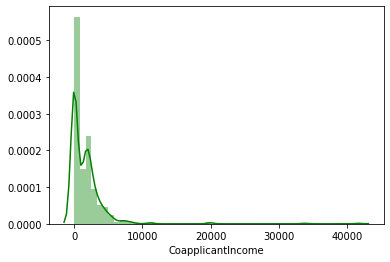

In [65]:
#to see the variable distribution
sns.distplot(train_data['CoapplicantIncome'], kde=True,color="g")

In [66]:
sum= train_data[train_data['CoapplicantIncome']>7000]
sum['CoapplicantIncome'].count()

15

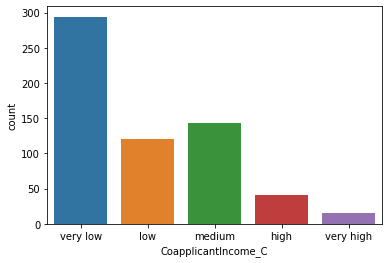

In [67]:
#CAPPING VALUES
#Capping above 7000 which since only 15 obs out of 614 obs have CoapplicantIncome greater than 7000 which is around 2.44%.
#So we will cap it at 7000
train_data['CoapplicantIncome_C']= np.where(train_data['CoapplicantIncome'] > 7000, 7000, train_data['CoapplicantIncome'])
#CONVERTING THEM INTO BINS
train_data['CoapplicantIncome_C']= pd.cut(train_data['CoapplicantIncome'],labels=["very low","low","medium","high","very high"],  bins= [0,1000,2000,4000,7000,50000],right=False)
#PLOTTING
sns.countplot(x='CoapplicantIncome_C',data = train_data)

In [68]:
#to check no null value has been created while forming bins
train_data['CoapplicantIncome_C'].isna().sum()

0

<h2><b><font size="5" face="Ribbon" color="black">COAPPLICANT INCOME TEST DATA</font></b></h2>


In [69]:
#FOR TEST DATA COAPPLICANT INCOME
test_data['CoapplicantIncome'].value_counts(bins=20)

(-24.001, 1200.0]     191
(1200.0, 2400.0]       82
(2400.0, 3600.0]       52
(3600.0, 4800.0]       29
(4800.0, 6000.0]        5
(7200.0, 8400.0]        2
(14400.0, 15600.0]      2
(6000.0, 7200.0]        1
(22800.0, 24000.0]      1
(13200.0, 14400.0]      1
(10800.0, 12000.0]      1
(12000.0, 13200.0]      0
(21600.0, 22800.0]      0
(9600.0, 10800.0]       0
(8400.0, 9600.0]        0
(15600.0, 16800.0]      0
(16800.0, 18000.0]      0
(18000.0, 19200.0]      0
(19200.0, 20400.0]      0
(20400.0, 21600.0]      0
Name: CoapplicantIncome, dtype: int64

In [70]:
#FOR TEST DATA COAPPLICANT INCOME
#CAPPING VALUES
test_data['CoapplicantIncome_C']= np.where(test_data['CoapplicantIncome'] > 7000, 7000, test_data['CoapplicantIncome'])
#CONVERTING THEM INTO BINS
test_data['CoapplicantIncome_C']= pd.cut(test_data['CoapplicantIncome'],labels=["very low","low","medium","high","very high"],  bins= [0,1000,2000,4000,7000,15000],right=False)


<h2><b><font size="5" face="Ribbon" color="black">LOAN AMOUNT TERM TRAIN DATA</font></b></h2>


In [71]:
#TRAIN DATA LOAN AMOUNT TERM
train_data['Loan_Amount_Term'].value_counts(bins=4)

(246.0, 363.0]     539
(129.0, 246.0]      48
(363.0, 480.0]      15
(11.531, 129.0]     12
Name: Loan_Amount_Term, dtype: int64

In [72]:
train_data['Loan_Amount_Term'].describe().transpose

<bound method IndexOpsMixin.transpose of count    614.000000
mean     342.000000
std       64.372489
min       12.000000
25%      360.000000
50%      360.000000
75%      360.000000
max      480.000000
Name: Loan_Amount_Term, dtype: float64>

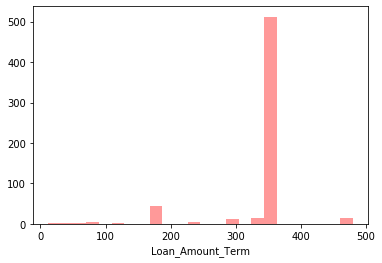

In [73]:
#to see the variable distribution
sns.distplot(train_data['Loan_Amount_Term'], kde=False,color="r")

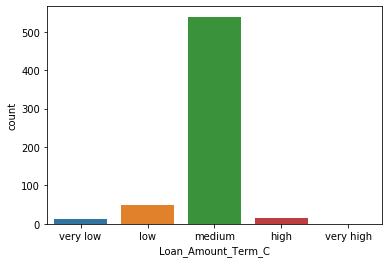

In [74]:
train_data['Loan_Amount_Term_C']= np.where(train_data['Loan_Amount_Term'] > 10000, 10000, train_data['Loan_Amount_Term'])
train_data['Loan_Amount_Term_C']= pd.cut(train_data['Loan_Amount_Term'],labels=["very low","low","medium","high","very high"], bins= [0,150,300,425,500,1000],right=False)
sns.countplot(x='Loan_Amount_Term_C',data = train_data)

In [75]:
#to check no null value has been created while forming bins
train_data['Loan_Amount_Term_C'].isna().sum()

0

In [76]:
test_data['Loan_Amount_Term'].value_counts(bins=4)

(243.0, 361.5]                 325
(124.5, 243.0]                  26
(361.5, 480.0]                   8
(5.5249999999999995, 124.5]      8
Name: Loan_Amount_Term, dtype: int64

<h2><b><font size="5" face="Ribbon" color="black">LOAN AMOUNT TERM TEST DATA</font></b></h2>


In [77]:
#FOR TEST DATA LOAN AMOUNT TERM
test_data['Loan_Amount_Term_C']= np.where(test_data['Loan_Amount_Term'] > 500, 500, test_data['Loan_Amount_Term'])
test_data['Loan_Amount_Term_C']= pd.cut(test_data['Loan_Amount_Term'],labels=["very low","low","medium","high","very high"], bins= [0,150,300,425,500,1000],right=False)

In [78]:
train_data.to_excel("Modified_train.xlsx")
test_data.to_excel("Modified_test.xlsx")